In [9]:
from dtw import dtw, dtwPlotTwoWay, dtwPlotThreeWay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pyts.approximation import PiecewiseAggregateApproximation

In [2]:
df = pd.read_csv("../m4_data/monthly-train.csv")

In [18]:
sample = df['V1'].sample(1).values[0]

In [135]:
sample

'M31220'

sample was M31220

In [100]:
ar = np.array(df[df['V1']==sample].iloc[:,1:].dropna(axis=1))

In [127]:
ws = 6 # length of subsequences

In [128]:
paa = PiecewiseAggregateApproximation(window_size=ws)

In [129]:
ar_paa = paa.transform(ar)

In [130]:
ar_paa[:5]

array([[ 443.83333333,  446.5       ,  460.33333333,  472.        ,
         493.16666667,  547.16666667,  612.5       ,  699.83333333,
         751.66666667,  736.83333333,  773.16666667,  779.83333333,
         813.5       ,  793.33333333,  764.66666667,  817.83333333,
         839.33333333,  852.83333333,  915.83333333,  973.83333333,
        1126.83333333, 1225.        , 1425.83333333, 1536.33333333,
        1788.66666667, 1963.66666667, 1741.        , 1727.66666667,
        1860.16666667, 1851.        , 1886.        , 2082.        ,
        2103.66666667, 2216.5       , 2449.66666667, 2558.33333333,
        2709.66666667, 2891.66666667, 3020.66666667, 3178.33333333,
        3417.66666667, 3497.66666667, 3593.83333333, 3617.83333333,
        3455.5       , 3514.        , 3644.        , 3808.66666667,
        3979.66666667, 4222.33333333, 4208.66666667, 3943.66666667,
        4018.83333333, 4053.83333333, 3710.33333333, 4198.83333333,
        4260.66666667, 4396.66666667, 4546.16666

In [131]:
ar_tmp = np.ones((ar_paa.shape[1],ws))
ar_paa = (ar_tmp.T*ar_paa).T.flatten()
x = np.linspace(0,ar_paa.shape[0],ar_paa.shape[0])

In [132]:
ar.shape

(1, 474)

In [133]:
ar_paa.shape

(474,)

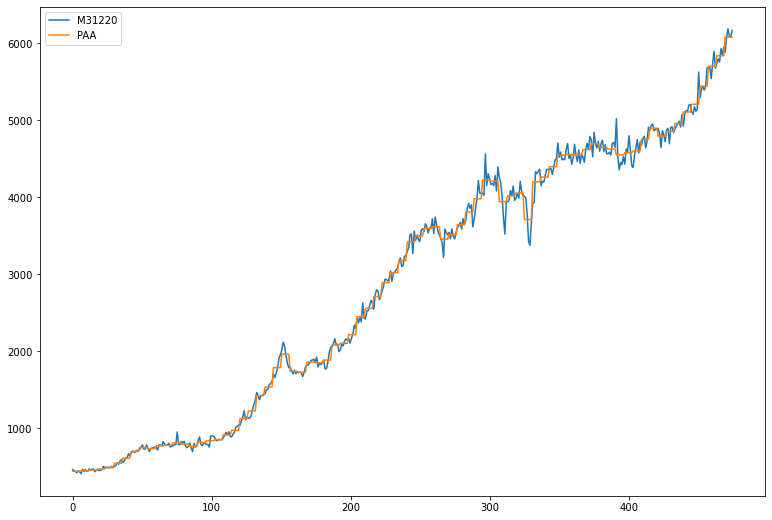

In [136]:
plt.figure(figsize=(13,9))
plt.plot(x, ar[0], label=sample);
plt.plot(x, ar_paa, label="PAA");
plt.legend()
plt.savefig("../img/paa_example.png")